In [1]:
from Model.DCVAE import DCVAE
from Model.Utils import PlotHistory, PlotDataAE, Save_Model
from Model.Utils import load_from_tfrecords, convert_to_tfrecords, load_numpy
from keras.optimizers import RMSprop,Adam
import numpy as np
# from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
%matplotlib notebook

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


# Load DataSet

In [2]:
load_tfrecords = True
create_tfrecords = False

path_tfr = 'DataSet/MPS40x200'
path_npy = '../../ModelosDeFacies/Model2FaciesLarge/DataSet.npy'
batch_size = 32

In [3]:
if load_tfrecords:    
    if create_tfrecords: 
        x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)
        convert_to_tfrecords(path_tfr,x_train,x_test)
        gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
    else:
        try:
            gen_train, gen_test = load_from_tfrecords(path_tfr, batch_size)
        except:
            print("Data not found. Change 'create_tfrecords' to True")
else:
    x_train, x_test = load_numpy(path_npy,random_state=0,split_data=0.30)

# Create Convolutional Variational Autoencoder

In [4]:
path_weights = os.path.join(path_tfr, 'w40x200_Facies.hdf5')

model = DCVAE(input_shape=(40, 200, 2),filters=[128,64,32],strides=[2,2,2],hidden_dim=2048,filepath=path_weights,
               KernelDim=(7,5,3),latent_dim=1024,opt=Adam(1e-4),dropout=0.0,epochs_drop=200)

# Training Network

In [5]:
num_epochs = 500

if load_tfrecords:
    x_train = gen_train.mps_generator()
    x_val   = gen_test.mps_generator()    
    model.fit_generator(x_train,
                        num_epochs=num_epochs, verbose=1, 
                        steps_per_epoch = len(gen_train),
                        val_set = x_val,
                        validation_steps = len(gen_test))
else:    
    model.fit(x_train, num_epochs=num_epochs, batch_size = batch_size, x_v=x_test,verbose=1) 

Setting up model...
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 200, 2)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 20, 100, 128) 12672       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 10, 50, 64)   204864      conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 5, 25, 32)    18464       conv2d_2[0][0]                   
_________________________________________________________________________________________

Epoch 1/500


1093/1093 [==============================] - 63s 58ms/step - loss: 5007.5248 - acc_pred: 0.6817 - val_loss: 4999.0062 - val_acc_pred: 0.6819
Epoch 2/500


1093/1093 [==============================] - 57s 53ms/step - loss: 4907.3833 - acc_pred: 0.6878 - val_loss: 4535.2804 - val_acc_pred: 0.7200
Epoch 3/500


1093/1093 [==============================] - 57s 52ms/step - loss: 4365.5495 - acc_pred: 0.7364 - val_loss: 4279.4125 - val_acc_pred: 0.7454
Epoch 4/500


1093/1093 [==============================] - 57s 53ms/step - loss: 4225.0606 - acc_pred: 0.7505 - val_loss: 4188.5042 - val_acc_pred: 0.7539
Epoch 5/500


1093/1093 [==============================] - 57s 52ms/step - loss: 4144.5144 - acc_pred: 0.7589 - val_loss: 4123.8331 - val_acc_pred: 0.7609
Epoch 6/500


1093/1093 [==============================] - 57s 53ms/step - loss: 4069.1586 - acc_pred: 0.7670 - val_loss: 4045.5373 - val_acc_pred: 0.7702
Epoch 7/500


1093/1093 [==============================] - 57s 52ms/step - loss: 3972.1272 - acc_pred: 0.7778 - val_loss: 3936.6642 - val_acc_pred: 0.7829
Epoch 8/500


1093/1093 [==============================] - 58s 53ms/step - loss: 3848.1515 - acc_pred: 0.7913 - val_loss: 3811.3794 - val_acc_pred: 0.7956
Epoch 9/500


1093/1093 [==============================] - 57s 52ms/step - loss: 3745.9080 - acc_pred: 0.8020 - val_loss: 3722.8953 - val_acc_pred: 0.8044
Epoch 10/500


1093/1093 [==============================] - 57s 53ms/step - loss: 3663.2353 - acc_pred: 0.8104 - val_loss: 3647.7980 - val_acc_pred: 0.8122
Epoch 11/500


1093/1093 [==============================] - 57s 53ms/step - loss: 3593.5936 - acc_pred: 0.8172 - val_loss: 3581.7960 - val_acc_pred: 0.8188
Epoch 12/500


1093/1093 [==============================] - 57s 52ms/step - loss: 3524.0270 - acc_pred: 0.8238 - val_loss: 3513.0371 - val_acc_pred: 0.8255
Epoch 13/500


1093/1093 [==============================] - 57s 53ms/step - loss: 3461.0357 - acc_pred: 0.8293 - val_loss: 3463.0311 - val_acc_pred: 0.8304
Epoch 14/500


1093/1093 [==============================] - 57s 52ms/step - loss: 3404.8835 - acc_pred: 0.8338 - val_loss: 3400.8618 - val_acc_pred: 0.8352
Epoch 15/500


1093/1093 [==============================] - 57s 53ms/step - loss: 3343.5285 - acc_pred: 0.8387 - val_loss: 3334.0582 - val_acc_pred: 0.8400
Epoch 16/500


1093/1093 [==============================] - 58s 53ms/step - loss: 3276.6108 - acc_pred: 0.8440 - val_loss: 3269.3267 - val_acc_pred: 0.8452
Epoch 17/500


1093/1093 [==============================] - 58s 53ms/step - loss: 3215.5747 - acc_pred: 0.8486 - val_loss: 3209.2203 - val_acc_pred: 0.8495
Epoch 18/500


1093/1093 [==============================] - 59s 54ms/step - loss: 3161.6818 - acc_pred: 0.8524 - val_loss: 3162.5904 - val_acc_pred: 0.8526
Epoch 19/500


1093/1093 [==============================] - 59s 54ms/step - loss: 3110.6512 - acc_pred: 0.8560 - val_loss: 3108.9104 - val_acc_pred: 0.8557
Epoch 20/500


1093/1093 [==============================] - 59s 54ms/step - loss: 3062.9946 - acc_pred: 0.8592 - val_loss: 3060.0895 - val_acc_pred: 0.8595
Epoch 21/500


1093/1093 [==============================] - 59s 54ms/step - loss: 3016.3176 - acc_pred: 0.8625 - val_loss: 3019.5289 - val_acc_pred: 0.8619
Epoch 22/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2973.2491 - acc_pred: 0.8655 - val_loss: 2979.5426 - val_acc_pred: 0.8647
Epoch 23/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2935.2827 - acc_pred: 0.8681 - val_loss: 2947.1728 - val_acc_pred: 0.8672
Epoch 24/500


1093/1093 [==============================] - 58s 54ms/step - loss: 2902.3068 - acc_pred: 0.8702 - val_loss: 2905.7348 - val_acc_pred: 0.8696
Epoch 25/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2873.1659 - acc_pred: 0.8721 - val_loss: 2886.3467 - val_acc_pred: 0.8711
Epoch 26/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2845.9095 - acc_pred: 0.8739 - val_loss: 2858.1903 - val_acc_pred: 0.8730
Epoch 27/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2820.5809 - acc_pred: 0.8755 - val_loss: 2839.2537 - val_acc_pred: 0.8742
Epoch 28/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2798.1299 - acc_pred: 0.8769 - val_loss: 2810.5676 - val_acc_pred: 0.8762
Epoch 29/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2775.5895 - acc_pred: 0.8784 - val_loss: 2793.7591 - val_acc_pred: 0.8776
Epoch 30/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2754.8143 - acc_pred: 0.8797 - val_loss: 2778.4583 - val_acc_pred: 0.8783
Epoch 31/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2737.0734 - acc_pred: 0.8809 - val_loss: 2759.1734 - val_acc_pred: 0.8800
Epoch 32/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2719.7900 - acc_pred: 0.8820 - val_loss: 2746.2823 - val_acc_pred: 0.8799
Epoch 33/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2702.8401 - acc_pred: 0.8831 - val_loss: 2726.9118 - val_acc_pred: 0.8813
Epoch 34/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2686.2745 - acc_pred: 0.8842 - val_loss: 2706.6215 - val_acc_pred: 0.8835
Epoch 35/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2672.1145 - acc_pred: 0.8852 - val_loss: 2695.7565 - val_acc_pred: 0.8837
Epoch 36/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2658.7116 - acc_pred: 0.8861 - val_loss: 2678.6507 - val_acc_pred: 0.8852
Epoch 37/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2644.6207 - acc_pred: 0.8871 - val_loss: 2667.1365 - val_acc_pred: 0.8860
Epoch 38/500


1093/1093 [==============================] - 60s 54ms/step - loss: 2632.8487 - acc_pred: 0.8879 - val_loss: 2656.2650 - val_acc_pred: 0.8872
Epoch 39/500


1093/1093 [==============================] - 60s 55ms/step - loss: 2620.8260 - acc_pred: 0.8887 - val_loss: 2659.3401 - val_acc_pred: 0.8862
Epoch 40/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2609.7966 - acc_pred: 0.8895 - val_loss: 2623.8654 - val_acc_pred: 0.8889
Epoch 41/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2599.2344 - acc_pred: 0.8902 - val_loss: 2629.3751 - val_acc_pred: 0.8883
Epoch 42/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2589.5015 - acc_pred: 0.8909 - val_loss: 2617.0786 - val_acc_pred: 0.8896
Epoch 43/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2580.5342 - acc_pred: 0.8915 - val_loss: 2605.9990 - val_acc_pred: 0.8902
Epoch 44/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2571.6730 - acc_pred: 0.8921 - val_loss: 2605.5502 - val_acc_pred: 0.8897
Epoch 45/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2563.2143 - acc_pred: 0.8927 - val_loss: 2591.9403 - val_acc_pred: 0.8914
Epoch 46/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2554.7176 - acc_pred: 0.8933 - val_loss: 2589.3736 - val_acc_pred: 0.8916
Epoch 47/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2547.2560 - acc_pred: 0.8938 - val_loss: 2586.8584 - val_acc_pred: 0.8905
Epoch 48/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2539.7254 - acc_pred: 0.8943 - val_loss: 2570.8610 - val_acc_pred: 0.8922
Epoch 49/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2532.3202 - acc_pred: 0.8948 - val_loss: 2564.7141 - val_acc_pred: 0.8923
Epoch 50/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2525.4180 - acc_pred: 0.8953 - val_loss: 2560.3888 - val_acc_pred: 0.8927
Epoch 51/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2518.3679 - acc_pred: 0.8958 - val_loss: 2548.5298 - val_acc_pred: 0.8939
Epoch 52/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2512.5993 - acc_pred: 0.8962 - val_loss: 2549.8304 - val_acc_pred: 0.8938
Epoch 53/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2505.7293 - acc_pred: 0.8966 - val_loss: 2534.0527 - val_acc_pred: 0.8947
Epoch 54/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2500.1060 - acc_pred: 0.8971 - val_loss: 2536.7824 - val_acc_pred: 0.8946
Epoch 55/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2494.7164 - acc_pred: 0.8974 - val_loss: 2531.0122 - val_acc_pred: 0.8955
Epoch 56/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2488.4190 - acc_pred: 0.8978 - val_loss: 2527.4809 - val_acc_pred: 0.8953
Epoch 57/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2483.4687 - acc_pred: 0.8982 - val_loss: 2521.5778 - val_acc_pred: 0.8962
Epoch 58/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2478.0830 - acc_pred: 0.8986 - val_loss: 2519.4849 - val_acc_pred: 0.8961
Epoch 59/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2471.4292 - acc_pred: 0.8990 - val_loss: 2514.1327 - val_acc_pred: 0.8964
Epoch 60/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2467.4165 - acc_pred: 0.8993 - val_loss: 2500.7696 - val_acc_pred: 0.8973
Epoch 61/500


1093/1093 [==============================] - 57s 53ms/step - loss: 2462.0743 - acc_pred: 0.8996 - val_loss: 2501.4082 - val_acc_pred: 0.8969
Epoch 62/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2456.2165 - acc_pred: 0.9000 - val_loss: 2494.4805 - val_acc_pred: 0.8978
Epoch 63/500


1093/1093 [==============================] - 57s 53ms/step - loss: 2452.1302 - acc_pred: 0.9003 - val_loss: 2486.9938 - val_acc_pred: 0.8986
Epoch 64/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2446.6648 - acc_pred: 0.9007 - val_loss: 2488.4510 - val_acc_pred: 0.8986
Epoch 65/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2440.7815 - acc_pred: 0.9011 - val_loss: 2485.5527 - val_acc_pred: 0.8982
Epoch 66/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2435.9659 - acc_pred: 0.9015 - val_loss: 2477.7394 - val_acc_pred: 0.8991
Epoch 67/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2431.9280 - acc_pred: 0.9018 - val_loss: 2471.9465 - val_acc_pred: 0.8992
Epoch 68/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2425.8418 - acc_pred: 0.9022 - val_loss: 2476.8008 - val_acc_pred: 0.8984
Epoch 69/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2421.5692 - acc_pred: 0.9025 - val_loss: 2464.7998 - val_acc_pred: 0.9003
Epoch 70/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2417.0336 - acc_pred: 0.9029 - val_loss: 2459.2432 - val_acc_pred: 0.9003
Epoch 71/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2412.1714 - acc_pred: 0.9032 - val_loss: 2460.8245 - val_acc_pred: 0.9005
Epoch 72/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2407.2826 - acc_pred: 0.9036 - val_loss: 2455.3445 - val_acc_pred: 0.9005
Epoch 73/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2403.3890 - acc_pred: 0.9038 - val_loss: 2469.1589 - val_acc_pred: 0.8999
Epoch 74/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2399.7080 - acc_pred: 0.9041 - val_loss: 2442.1633 - val_acc_pred: 0.9023
Epoch 75/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2394.9811 - acc_pred: 0.9045 - val_loss: 2439.3039 - val_acc_pred: 0.9018
Epoch 76/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2391.6673 - acc_pred: 0.9047 - val_loss: 2431.2262 - val_acc_pred: 0.9026
Epoch 77/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2387.5295 - acc_pred: 0.9050 - val_loss: 2435.0715 - val_acc_pred: 0.9023
Epoch 78/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2383.8120 - acc_pred: 0.9053 - val_loss: 2438.9247 - val_acc_pred: 0.9018
Epoch 79/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2380.8107 - acc_pred: 0.9055 - val_loss: 2436.6243 - val_acc_pred: 0.9021
Epoch 80/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2377.3825 - acc_pred: 0.9058 - val_loss: 2417.0596 - val_acc_pred: 0.9034
Epoch 81/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2373.9042 - acc_pred: 0.9060 - val_loss: 2423.7878 - val_acc_pred: 0.9029
Epoch 82/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2371.2434 - acc_pred: 0.9062 - val_loss: 2420.4625 - val_acc_pred: 0.9032
Epoch 83/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2367.0379 - acc_pred: 0.9065 - val_loss: 2428.1757 - val_acc_pred: 0.9029
Epoch 84/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2364.3979 - acc_pred: 0.9067 - val_loss: 2411.0944 - val_acc_pred: 0.9040
Epoch 85/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2360.7322 - acc_pred: 0.9069 - val_loss: 2406.7051 - val_acc_pred: 0.9042
Epoch 86/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2358.1570 - acc_pred: 0.9071 - val_loss: 2414.2573 - val_acc_pred: 0.9041
Epoch 87/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2355.5584 - acc_pred: 0.9073 - val_loss: 2401.7738 - val_acc_pred: 0.9047
Epoch 88/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2353.3801 - acc_pred: 0.9075 - val_loss: 2401.1453 - val_acc_pred: 0.9049
Epoch 89/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2350.1703 - acc_pred: 0.9077 - val_loss: 2401.9577 - val_acc_pred: 0.9048
Epoch 90/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2348.4754 - acc_pred: 0.9078 - val_loss: 2398.3278 - val_acc_pred: 0.9050
Epoch 91/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2345.1522 - acc_pred: 0.9080 - val_loss: 2402.0759 - val_acc_pred: 0.9054
Epoch 92/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2342.7348 - acc_pred: 0.9082 - val_loss: 2396.0172 - val_acc_pred: 0.9048
Epoch 93/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2340.4442 - acc_pred: 0.9084 - val_loss: 2395.0530 - val_acc_pred: 0.9054
Epoch 94/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2338.4139 - acc_pred: 0.9085 - val_loss: 2393.6472 - val_acc_pred: 0.9060
Epoch 95/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2335.7424 - acc_pred: 0.9087 - val_loss: 2395.2978 - val_acc_pred: 0.9047
Epoch 96/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2333.1616 - acc_pred: 0.9089 - val_loss: 2386.2590 - val_acc_pred: 0.9061
Epoch 97/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2331.2807 - acc_pred: 0.9091 - val_loss: 2394.4139 - val_acc_pred: 0.9055
Epoch 98/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2329.3878 - acc_pred: 0.9092 - val_loss: 2383.5974 - val_acc_pred: 0.9057
Epoch 99/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2325.8672 - acc_pred: 0.9094 - val_loss: 2385.1569 - val_acc_pred: 0.9060
Epoch 100/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2325.3669 - acc_pred: 0.9095 - val_loss: 2383.3448 - val_acc_pred: 0.9059
Epoch 101/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2323.8311 - acc_pred: 0.9096 - val_loss: 2377.6062 - val_acc_pred: 0.9068
Epoch 102/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2321.0518 - acc_pred: 0.9098 - val_loss: 2380.6420 - val_acc_pred: 0.9064
Epoch 103/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2319.6734 - acc_pred: 0.9099 - val_loss: 2376.8416 - val_acc_pred: 0.9065
Epoch 104/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2317.8872 - acc_pred: 0.9100 - val_loss: 2379.7097 - val_acc_pred: 0.9064
Epoch 105/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2315.8914 - acc_pred: 0.9102 - val_loss: 2371.7754 - val_acc_pred: 0.9067
Epoch 106/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2314.5275 - acc_pred: 0.9103 - val_loss: 2383.5164 - val_acc_pred: 0.9061
Epoch 107/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2312.6874 - acc_pred: 0.9104 - val_loss: 2376.1671 - val_acc_pred: 0.9068
Epoch 108/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2310.8441 - acc_pred: 0.9105 - val_loss: 2373.1409 - val_acc_pred: 0.9064
Epoch 109/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2309.7146 - acc_pred: 0.9106 - val_loss: 2370.1910 - val_acc_pred: 0.9069
Epoch 110/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2308.2671 - acc_pred: 0.9107 - val_loss: 2368.0072 - val_acc_pred: 0.9073
Epoch 111/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2306.5810 - acc_pred: 0.9108 - val_loss: 2368.5489 - val_acc_pred: 0.9074
Epoch 112/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2305.4813 - acc_pred: 0.9109 - val_loss: 2363.5330 - val_acc_pred: 0.9076
Epoch 113/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2304.0714 - acc_pred: 0.9110 - val_loss: 2368.1476 - val_acc_pred: 0.9072
Epoch 114/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2302.6634 - acc_pred: 0.9111 - val_loss: 2366.3695 - val_acc_pred: 0.9071
Epoch 115/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2301.4323 - acc_pred: 0.9112 - val_loss: 2368.2202 - val_acc_pred: 0.9069
Epoch 116/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2299.2860 - acc_pred: 0.9114 - val_loss: 2378.1719 - val_acc_pred: 0.9061
Epoch 117/500


1093/1093 [==============================] - 57s 53ms/step - loss: 2298.7245 - acc_pred: 0.9114 - val_loss: 2364.0109 - val_acc_pred: 0.9077

Epoch 00117: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 118/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2257.1635 - acc_pred: 0.9142 - val_loss: 2321.5913 - val_acc_pred: 0.9103
Epoch 119/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2253.7041 - acc_pred: 0.9145 - val_loss: 2317.9488 - val_acc_pred: 0.9109
Epoch 120/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2253.0944 - acc_pred: 0.9146 - val_loss: 2314.8364 - val_acc_pred: 0.9112
Epoch 121/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2252.1418 - acc_pred: 0.9147 - val_loss: 2318.7627 - val_acc_pred: 0.9111
Epoch 122/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2250.9739 - acc_pred: 0.9147 - val_loss: 2314.7831 - val_acc_pred: 0.9112
Epoch 123/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2249.4859 - acc_pred: 0.9149 - val_loss: 2312.9440 - val_acc_pred: 0.9113
Epoch 124/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2249.1256 - acc_pred: 0.9149 - val_loss: 2314.6179 - val_acc_pred: 0.9111
Epoch 125/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2248.1839 - acc_pred: 0.9150 - val_loss: 2316.3192 - val_acc_pred: 0.9108
Epoch 126/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2247.3861 - acc_pred: 0.9151 - val_loss: 2312.8359 - val_acc_pred: 0.9110
Epoch 127/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2246.0367 - acc_pred: 0.9152 - val_loss: 2310.9856 - val_acc_pred: 0.9114
Epoch 128/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2245.3699 - acc_pred: 0.9152 - val_loss: 2314.7992 - val_acc_pred: 0.9111
Epoch 129/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2244.7497 - acc_pred: 0.9153 - val_loss: 2311.3105 - val_acc_pred: 0.9121
Epoch 130/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2244.4255 - acc_pred: 0.9153 - val_loss: 2310.6436 - val_acc_pred: 0.9117
Epoch 131/500


1093/1093 [==============================] - 57s 53ms/step - loss: 2243.0522 - acc_pred: 0.9154 - val_loss: 2313.5520 - val_acc_pred: 0.9115
Epoch 132/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2242.4865 - acc_pred: 0.9155 - val_loss: 2312.3781 - val_acc_pred: 0.9117
Epoch 133/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2241.9067 - acc_pred: 0.9155 - val_loss: 2315.1725 - val_acc_pred: 0.9116
Epoch 134/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2241.0571 - acc_pred: 0.9156 - val_loss: 2308.1908 - val_acc_pred: 0.9128
Epoch 135/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2240.4259 - acc_pred: 0.9156 - val_loss: 2306.5651 - val_acc_pred: 0.9119
Epoch 136/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2239.5127 - acc_pred: 0.9157 - val_loss: 2308.2212 - val_acc_pred: 0.9118
Epoch 137/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2238.4038 - acc_pred: 0.9158 - val_loss: 2310.0587 - val_acc_pred: 0.9119
Epoch 138/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2237.8210 - acc_pred: 0.9158 - val_loss: 2308.9775 - val_acc_pred: 0.9118
Epoch 139/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2237.7522 - acc_pred: 0.9158 - val_loss: 2309.7297 - val_acc_pred: 0.9115
Epoch 140/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2237.0494 - acc_pred: 0.9159 - val_loss: 2305.1875 - val_acc_pred: 0.9120
Epoch 141/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2236.1109 - acc_pred: 0.9160 - val_loss: 2305.5614 - val_acc_pred: 0.9120
Epoch 142/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2235.5183 - acc_pred: 0.9160 - val_loss: 2307.0477 - val_acc_pred: 0.9116
Epoch 143/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2234.8732 - acc_pred: 0.9161 - val_loss: 2306.2621 - val_acc_pred: 0.9116
Epoch 144/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2234.3169 - acc_pred: 0.9161 - val_loss: 2306.5395 - val_acc_pred: 0.9123
Epoch 145/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2233.6167 - acc_pred: 0.9161 - val_loss: 2303.8148 - val_acc_pred: 0.9124
Epoch 146/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2233.1183 - acc_pred: 0.9162 - val_loss: 2306.5414 - val_acc_pred: 0.9119
Epoch 147/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2232.4640 - acc_pred: 0.9162 - val_loss: 2301.2339 - val_acc_pred: 0.9124
Epoch 148/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2231.9335 - acc_pred: 0.9163 - val_loss: 2303.2185 - val_acc_pred: 0.9123
Epoch 149/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2231.2508 - acc_pred: 0.9164 - val_loss: 2304.6801 - val_acc_pred: 0.9119
Epoch 150/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2230.8869 - acc_pred: 0.9164 - val_loss: 2297.5510 - val_acc_pred: 0.9127
Epoch 151/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2230.0249 - acc_pred: 0.9165 - val_loss: 2300.5735 - val_acc_pred: 0.9123
Epoch 152/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2229.3356 - acc_pred: 0.9165 - val_loss: 2303.7295 - val_acc_pred: 0.9122
Epoch 153/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2228.7880 - acc_pred: 0.9165 - val_loss: 2298.0498 - val_acc_pred: 0.9124
Epoch 154/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2228.3324 - acc_pred: 0.9166 - val_loss: 2300.2352 - val_acc_pred: 0.9124
Epoch 155/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2227.4395 - acc_pred: 0.9167 - val_loss: 2299.8220 - val_acc_pred: 0.9125

Epoch 00155: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
Epoch 156/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2207.1419 - acc_pred: 0.9180 - val_loss: 2276.3488 - val_acc_pred: 0.9142
Epoch 157/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2205.3708 - acc_pred: 0.9182 - val_loss: 2276.4667 - val_acc_pred: 0.9144
Epoch 158/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2204.1575 - acc_pred: 0.9182 - val_loss: 2272.7426 - val_acc_pred: 0.9147
Epoch 159/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2203.7756 - acc_pred: 0.9183 - val_loss: 2273.9013 - val_acc_pred: 0.9146
Epoch 160/500


1093/1093 [==============================] - 57s 53ms/step - loss: 2203.5700 - acc_pred: 0.9183 - val_loss: 2275.0864 - val_acc_pred: 0.9146
Epoch 161/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2203.2250 - acc_pred: 0.9183 - val_loss: 2273.7671 - val_acc_pred: 0.9143
Epoch 162/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2202.0713 - acc_pred: 0.9184 - val_loss: 2270.6285 - val_acc_pred: 0.9148
Epoch 163/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2202.3357 - acc_pred: 0.9184 - val_loss: 2273.8528 - val_acc_pred: 0.9146
Epoch 164/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2201.8221 - acc_pred: 0.9185 - val_loss: 2273.4756 - val_acc_pred: 0.9145
Epoch 165/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2201.2634 - acc_pred: 0.9185 - val_loss: 2274.3517 - val_acc_pred: 0.9142
Epoch 166/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2201.1364 - acc_pred: 0.9185 - val_loss: 2272.9068 - val_acc_pred: 0.9145
Epoch 167/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2200.5105 - acc_pred: 0.9186 - val_loss: 2271.5293 - val_acc_pred: 0.9144

Epoch 00167: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
Epoch 168/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2189.6181 - acc_pred: 0.9193 - val_loss: 2260.0626 - val_acc_pred: 0.9154
Epoch 169/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2188.2695 - acc_pred: 0.9194 - val_loss: 2260.4000 - val_acc_pred: 0.9153
Epoch 170/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2187.8637 - acc_pred: 0.9195 - val_loss: 2260.0001 - val_acc_pred: 0.9152
Epoch 171/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2187.3130 - acc_pred: 0.9195 - val_loss: 2260.5579 - val_acc_pred: 0.9152
Epoch 172/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2187.3842 - acc_pred: 0.9195 - val_loss: 2258.1731 - val_acc_pred: 0.9156
Epoch 173/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2186.8967 - acc_pred: 0.9195 - val_loss: 2258.5253 - val_acc_pred: 0.9156
Epoch 174/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2186.7491 - acc_pred: 0.9196 - val_loss: 2258.3933 - val_acc_pred: 0.9156
Epoch 175/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2186.6436 - acc_pred: 0.9196 - val_loss: 2259.1555 - val_acc_pred: 0.9157
Epoch 176/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2186.1494 - acc_pred: 0.9196 - val_loss: 2258.7820 - val_acc_pred: 0.9157
Epoch 177/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2185.8731 - acc_pred: 0.9196 - val_loss: 2258.6611 - val_acc_pred: 0.9156

Epoch 00177: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-06.
Epoch 178/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2180.2988 - acc_pred: 0.9200 - val_loss: 2252.6025 - val_acc_pred: 0.9161
Epoch 179/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2179.5993 - acc_pred: 0.9201 - val_loss: 2251.0018 - val_acc_pred: 0.9161
Epoch 180/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2179.1700 - acc_pred: 0.9201 - val_loss: 2251.2290 - val_acc_pred: 0.9162
Epoch 181/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2179.0592 - acc_pred: 0.9201 - val_loss: 2250.9147 - val_acc_pred: 0.9160
Epoch 182/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2179.1672 - acc_pred: 0.9201 - val_loss: 2250.9601 - val_acc_pred: 0.9162
Epoch 183/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2178.6280 - acc_pred: 0.9202 - val_loss: 2250.5237 - val_acc_pred: 0.9162
Epoch 184/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2178.5366 - acc_pred: 0.9202 - val_loss: 2249.4070 - val_acc_pred: 0.9162
Epoch 185/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2178.4029 - acc_pred: 0.9202 - val_loss: 2250.5620 - val_acc_pred: 0.9161
Epoch 186/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2178.2386 - acc_pred: 0.9202 - val_loss: 2249.6358 - val_acc_pred: 0.9161
Epoch 187/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2177.8479 - acc_pred: 0.9202 - val_loss: 2250.1041 - val_acc_pred: 0.9161
Epoch 188/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2177.9579 - acc_pred: 0.9202 - val_loss: 2248.7134 - val_acc_pred: 0.9163
Epoch 189/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2177.8008 - acc_pred: 0.9202 - val_loss: 2249.5832 - val_acc_pred: 0.9162
Epoch 190/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2178.0439 - acc_pred: 0.9203 - val_loss: 2248.7267 - val_acc_pred: 0.9163
Epoch 191/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2177.3903 - acc_pred: 0.9203 - val_loss: 2249.1759 - val_acc_pred: 0.9164
Epoch 192/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2177.5515 - acc_pred: 0.9203 - val_loss: 2248.1496 - val_acc_pred: 0.9163
Epoch 193/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2177.2648 - acc_pred: 0.9203 - val_loss: 2248.9656 - val_acc_pred: 0.9162
Epoch 194/500


1093/1093 [==============================] - 57s 53ms/step - loss: 2177.1304 - acc_pred: 0.9203 - val_loss: 2249.1523 - val_acc_pred: 0.9162
Epoch 195/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2177.1440 - acc_pred: 0.9203 - val_loss: 2248.5436 - val_acc_pred: 0.9163
Epoch 196/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2177.0363 - acc_pred: 0.9203 - val_loss: 2247.9583 - val_acc_pred: 0.9162
Epoch 197/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2176.8422 - acc_pred: 0.9203 - val_loss: 2249.4734 - val_acc_pred: 0.9161
Epoch 198/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2176.8838 - acc_pred: 0.9203 - val_loss: 2250.3851 - val_acc_pred: 0.9161
Epoch 199/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2176.6004 - acc_pred: 0.9204 - val_loss: 2249.4774 - val_acc_pred: 0.9163
Epoch 200/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2175.3383 - acc_pred: 0.9205 - val_loss: 2247.3977 - val_acc_pred: 0.9164
Epoch 201/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2175.1150 - acc_pred: 0.9205 - val_loss: 2246.6684 - val_acc_pred: 0.9165
Epoch 202/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2175.1680 - acc_pred: 0.9205 - val_loss: 2246.4718 - val_acc_pred: 0.9164
Epoch 203/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2175.0042 - acc_pred: 0.9205 - val_loss: 2246.3549 - val_acc_pred: 0.9166
Epoch 204/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2174.7888 - acc_pred: 0.9205 - val_loss: 2247.3089 - val_acc_pred: 0.9163
Epoch 205/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2174.7447 - acc_pred: 0.9205 - val_loss: 2246.2073 - val_acc_pred: 0.9163
Epoch 206/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2174.7401 - acc_pred: 0.9205 - val_loss: 2247.2064 - val_acc_pred: 0.9165
Epoch 207/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2174.5219 - acc_pred: 0.9205 - val_loss: 2246.6512 - val_acc_pred: 0.9163
Epoch 208/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2174.4890 - acc_pred: 0.9205 - val_loss: 2246.4290 - val_acc_pred: 0.9164
Epoch 209/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2174.3321 - acc_pred: 0.9205 - val_loss: 2246.8051 - val_acc_pred: 0.9164
Epoch 210/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2174.3464 - acc_pred: 0.9205 - val_loss: 2245.2913 - val_acc_pred: 0.9167
Epoch 211/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2174.3172 - acc_pred: 0.9206 - val_loss: 2246.6343 - val_acc_pred: 0.9164
Epoch 212/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2174.0568 - acc_pred: 0.9206 - val_loss: 2246.7937 - val_acc_pred: 0.9165
Epoch 213/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2173.7016 - acc_pred: 0.9206 - val_loss: 2246.2461 - val_acc_pred: 0.9165
Epoch 214/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2173.9381 - acc_pred: 0.9206 - val_loss: 2244.9726 - val_acc_pred: 0.9165
Epoch 215/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2174.0139 - acc_pred: 0.9206 - val_loss: 2246.1708 - val_acc_pred: 0.9165
Epoch 216/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2173.5321 - acc_pred: 0.9206 - val_loss: 2246.7684 - val_acc_pred: 0.9163
Epoch 217/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2173.3302 - acc_pred: 0.9206 - val_loss: 2246.1659 - val_acc_pred: 0.9166
Epoch 218/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2173.4369 - acc_pred: 0.9206 - val_loss: 2246.4293 - val_acc_pred: 0.9164
Epoch 219/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2173.3914 - acc_pred: 0.9206 - val_loss: 2246.0533 - val_acc_pred: 0.9166

Epoch 00219: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
Epoch 220/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2171.1247 - acc_pred: 0.9208 - val_loss: 2243.6160 - val_acc_pred: 0.9167
Epoch 221/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2171.0635 - acc_pred: 0.9208 - val_loss: 2243.1848 - val_acc_pred: 0.9167
Epoch 222/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.5136 - acc_pred: 0.9208 - val_loss: 2243.0632 - val_acc_pred: 0.9167
Epoch 223/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.7551 - acc_pred: 0.9208 - val_loss: 2243.5471 - val_acc_pred: 0.9168
Epoch 224/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.5395 - acc_pred: 0.9208 - val_loss: 2243.0614 - val_acc_pred: 0.9167
Epoch 225/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.4447 - acc_pred: 0.9208 - val_loss: 2242.5569 - val_acc_pred: 0.9168
Epoch 226/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.2923 - acc_pred: 0.9208 - val_loss: 2242.6316 - val_acc_pred: 0.9167
Epoch 227/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2169.9709 - acc_pred: 0.9209 - val_loss: 2242.4081 - val_acc_pred: 0.9168
Epoch 228/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.1017 - acc_pred: 0.9209 - val_loss: 2242.3488 - val_acc_pred: 0.9168
Epoch 229/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.9044 - acc_pred: 0.9209 - val_loss: 2242.2497 - val_acc_pred: 0.9167
Epoch 230/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2170.1547 - acc_pred: 0.9209 - val_loss: 2242.3814 - val_acc_pred: 0.9168
Epoch 231/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.9292 - acc_pred: 0.9209 - val_loss: 2242.7835 - val_acc_pred: 0.9167
Epoch 232/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2170.2829 - acc_pred: 0.9209 - val_loss: 2242.2247 - val_acc_pred: 0.9168
Epoch 233/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2170.1714 - acc_pred: 0.9209 - val_loss: 2241.4365 - val_acc_pred: 0.9169
Epoch 234/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2170.1044 - acc_pred: 0.9209 - val_loss: 2242.2932 - val_acc_pred: 0.9168
Epoch 235/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.7131 - acc_pred: 0.9209 - val_loss: 2242.1634 - val_acc_pred: 0.9168
Epoch 236/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.7530 - acc_pred: 0.9209 - val_loss: 2241.4000 - val_acc_pred: 0.9169
Epoch 237/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.6129 - acc_pred: 0.9209 - val_loss: 2241.4063 - val_acc_pred: 0.9169
Epoch 238/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.8321 - acc_pred: 0.9209 - val_loss: 2241.6623 - val_acc_pred: 0.9168
Epoch 239/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.3233 - acc_pred: 0.9209 - val_loss: 2242.1129 - val_acc_pred: 0.9168
Epoch 240/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2169.7193 - acc_pred: 0.9209 - val_loss: 2241.6640 - val_acc_pred: 0.9168
Epoch 241/500


1093/1093 [==============================] - 58s 53ms/step - loss: 2169.4215 - acc_pred: 0.9209 - val_loss: 2241.6122 - val_acc_pred: 0.9168

Epoch 00241: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-06.
Epoch 242/500


1093/1093 [==============================] - 59s 54ms/step - loss: 2168.3643 - acc_pred: 0.9210 - val_loss: 2241.0970 - val_acc_pred: 0.9169
Epoch 243/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2168.4772 - acc_pred: 0.9210 - val_loss: 2240.6194 - val_acc_pred: 0.9169
Epoch 244/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2168.2379 - acc_pred: 0.9210 - val_loss: 2240.4573 - val_acc_pred: 0.9169
Epoch 245/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2167.9396 - acc_pred: 0.9210 - val_loss: 2240.2978 - val_acc_pred: 0.9169
Epoch 246/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2167.8829 - acc_pred: 0.9210 - val_loss: 2239.9610 - val_acc_pred: 0.9170
Epoch 247/500


1093/1093 [==============================] - 57s 52ms/step - loss: 2168.0563 - acc_pred: 0.9210 - val_loss: 2239.7777 - val_acc_pred: 0.9170
Epoch 248/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.8860 - acc_pred: 0.9210 - val_loss: 2240.1215 - val_acc_pred: 0.9170
Epoch 249/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2167.9872 - acc_pred: 0.9210 - val_loss: 2240.4975 - val_acc_pred: 0.9169
Epoch 250/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2167.6720 - acc_pred: 0.9210 - val_loss: 2240.4309 - val_acc_pred: 0.9170
Epoch 251/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.5519 - acc_pred: 0.9210 - val_loss: 2240.3492 - val_acc_pred: 0.9169
Epoch 252/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.4875 - acc_pred: 0.9211 - val_loss: 2239.7183 - val_acc_pred: 0.9170
Epoch 253/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2168.0358 - acc_pred: 0.9210 - val_loss: 2240.1188 - val_acc_pred: 0.9170
Epoch 254/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.8384 - acc_pred: 0.9211 - val_loss: 2240.1752 - val_acc_pred: 0.9169
Epoch 255/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.5809 - acc_pred: 0.9211 - val_loss: 2240.0342 - val_acc_pred: 0.9170
Epoch 256/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2167.7292 - acc_pred: 0.9210 - val_loss: 2239.5246 - val_acc_pred: 0.9170
Epoch 257/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2167.6625 - acc_pred: 0.9211 - val_loss: 2239.5355 - val_acc_pred: 0.9170
Epoch 258/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2167.4452 - acc_pred: 0.9211 - val_loss: 2239.4733 - val_acc_pred: 0.9170
Epoch 259/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2167.7608 - acc_pred: 0.9211 - val_loss: 2240.0209 - val_acc_pred: 0.9170
Epoch 260/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.4332 - acc_pred: 0.9211 - val_loss: 2239.6688 - val_acc_pred: 0.9170
Epoch 261/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2167.4979 - acc_pred: 0.9211 - val_loss: 2240.1455 - val_acc_pred: 0.9169
Epoch 262/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2167.5917 - acc_pred: 0.9211 - val_loss: 2239.7804 - val_acc_pred: 0.9170
Epoch 263/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2167.5229 - acc_pred: 0.9211 - val_loss: 2240.0082 - val_acc_pred: 0.9170

Epoch 00263: ReduceLROnPlateau reducing learning rate to 6.24999984211172e-07.
Epoch 264/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.8755 - acc_pred: 0.9211 - val_loss: 2239.0812 - val_acc_pred: 0.9170
Epoch 265/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.8394 - acc_pred: 0.9211 - val_loss: 2238.6260 - val_acc_pred: 0.9170
Epoch 266/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.4852 - acc_pred: 0.9211 - val_loss: 2238.8288 - val_acc_pred: 0.9170
Epoch 267/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2166.9736 - acc_pred: 0.9211 - val_loss: 2239.0393 - val_acc_pred: 0.9171
Epoch 268/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2166.7319 - acc_pred: 0.9211 - val_loss: 2239.1451 - val_acc_pred: 0.9170
Epoch 269/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.7835 - acc_pred: 0.9211 - val_loss: 2238.7312 - val_acc_pred: 0.9170
Epoch 270/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2166.4889 - acc_pred: 0.9211 - val_loss: 2238.8542 - val_acc_pred: 0.9170

Epoch 00270: ReduceLROnPlateau reducing learning rate to 5e-07.
Epoch 271/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.2313 - acc_pred: 0.9211 - val_loss: 2238.1969 - val_acc_pred: 0.9171
Epoch 272/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.5025 - acc_pred: 0.9212 - val_loss: 2238.7396 - val_acc_pred: 0.9170
Epoch 273/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.5156 - acc_pred: 0.9211 - val_loss: 2238.6346 - val_acc_pred: 0.9170
Epoch 274/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.7191 - acc_pred: 0.9211 - val_loss: 2238.6458 - val_acc_pred: 0.9171
Epoch 275/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.3323 - acc_pred: 0.9212 - val_loss: 2238.3315 - val_acc_pred: 0.9171
Epoch 276/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.3161 - acc_pred: 0.9212 - val_loss: 2239.2422 - val_acc_pred: 0.9171
Epoch 277/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.4289 - acc_pred: 0.9211 - val_loss: 2238.0072 - val_acc_pred: 0.9171
Epoch 278/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2166.2459 - acc_pred: 0.9212 - val_loss: 2238.2888 - val_acc_pred: 0.9171
Epoch 279/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.3767 - acc_pred: 0.9211 - val_loss: 2238.2597 - val_acc_pred: 0.9171
Epoch 280/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2166.6142 - acc_pred: 0.9211 - val_loss: 2238.4197 - val_acc_pred: 0.9171
Epoch 281/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.4248 - acc_pred: 0.9212 - val_loss: 2239.0002 - val_acc_pred: 0.9171
Epoch 282/500


1093/1093 [==============================] - 55s 51ms/step - loss: 2166.3031 - acc_pred: 0.9212 - val_loss: 2238.5952 - val_acc_pred: 0.9171
Epoch 283/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.2799 - acc_pred: 0.9212 - val_loss: 2238.3731 - val_acc_pred: 0.9171
Epoch 284/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.1269 - acc_pred: 0.9212 - val_loss: 2238.1834 - val_acc_pred: 0.9171
Epoch 285/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.1630 - acc_pred: 0.9212 - val_loss: 2238.6805 - val_acc_pred: 0.9171
Epoch 286/500


1093/1093 [==============================] - 56s 51ms/step - loss: 2166.1477 - acc_pred: 0.9212 - val_loss: 2238.3311 - val_acc_pred: 0.9171
Epoch 287/500


1093/1093 [==============================] - 55s 50ms/step - loss: 2166.1608 - acc_pred: 0.9212 - val_loss: 2238.0284 - val_acc_pred: 0.9171



# Ploting Train History

val_loss   :  [2238.373071915064, 2238.183405949519, 2238.6804793920273, 2238.3310906825923]
loss   :  [2166.279883884664, 2166.126924980701, 2166.1629896661284, 2166.14771870354]


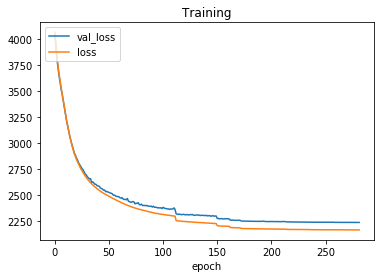

In [6]:
PlotHistory(model.history.history,listKeys=['val_loss','loss']) 

val_acc_pred   :  [0.917112322189869, 0.9171386890941196, 0.9171096580660242, 0.9170993172969574]
acc_pred   :  [0.9211569781272867, 0.9211745408839953, 0.921172096766361, 0.9211649635136946]


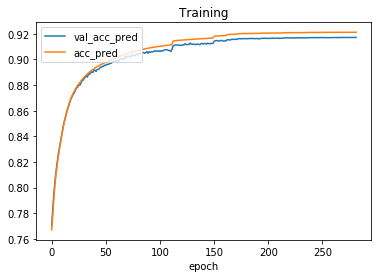

In [7]:
PlotHistory(model.history.history,listKeys=['val_acc_pred','acc_pred'])

lr   :  [5e-07, 5e-07, 5e-07, 5e-07]


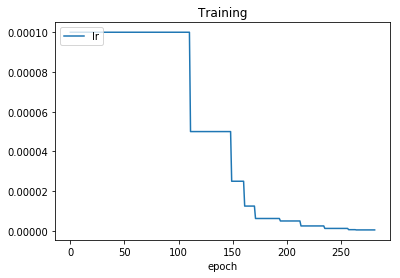

In [8]:
PlotHistory(model.history.history,listKeys=['lr'])

# Evaluate Model with Test dataset 

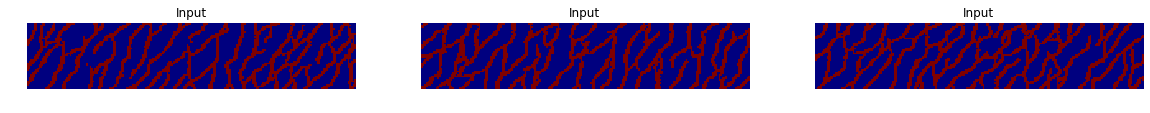

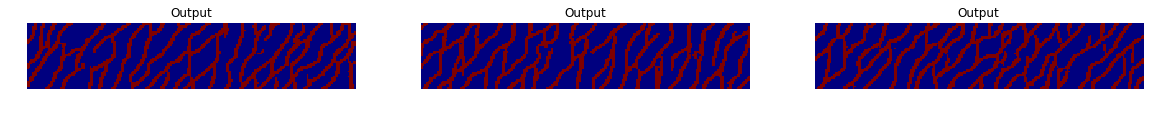

In [9]:
if load_tfrecords:
    x_test = gen_test.get_numpy_batch()

x_rec = model.model.predict(x_test)
PlotDataAE(np.argmax(x_test[:,:,:,:],axis=-1),np.argmax(x_rec[:,:,:,:],axis=-1),digit_size=(40,200),num=3,figsize=(20,10))

# Generate random sampling

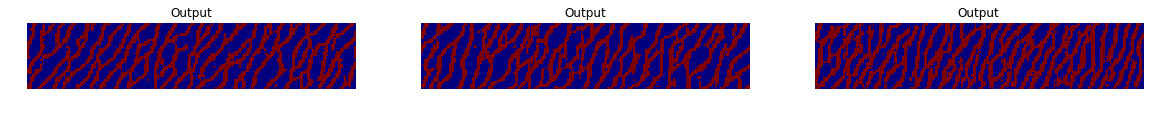

In [10]:
x_gen=model.generate(binary=True)
PlotDataAE([],x_gen[:,:,:],Only_Result=False,digit_size=(40,200),num=3,figsize=(20,10))